In [12]:
"""import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns 
from mpl_toolkits.mplot3d import Axes3D
from scipy import linalg as la
from scipy import optimize
from scipy import stats
from scipy.stats import chisquare
from decimal import Decimal"""
import numpy as np
from scipy import linalg as la
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [50]:
import Earthquakes as E

In [14]:
df = E.ImportDataset()

# 0 - Understanding data

First of all we took a look at the dataset.

In [15]:
df.head()

,event,prev_event,time,magnitude,x,y,z
0,0,-1,0.00000,2.71,-2571956,-4627162,3520602
1,1,0,36501.39072,2.12,-2363740,-4787011,3461373
2,2,0,37488.27744,2.33,-2363746,-4786942,3461232
3,3,0,47982.51648,2.57,-2475085,-4664024,3548479
4,4,0,60268.57056,2.98,-2238642,-4839098,3469546


we can see that the range of magnitudes is [2,7.3] 
and that the measurement of time starts from 0 with the first event


In [16]:
df.describe()

,event,prev_event,time,magnitude,x,y,z
count,110271.000000,110271.000000,1.102710e+05,110271.000000,1.102710e+05,1.102710e+05,1.102710e+05
mean,55135.000000,35859.277625,4.262426e+08,2.457920,-2.388225e+06,-4.691072e+06,3.562612e+06
std,31832.640104,36365.001297,2.598605e+08,0.438374,8.878019e+04,1.237294e+05,1.271897e+05
min,0.000000,-1.000000,0.000000e+00,2.000000,-2.770239e+06,-5.020849e+06,3.186133e+06
25%,27567.500000,-1.000000,2.115783e+08,2.140000,-2.421620e+06,-4.801152e+06,3.458838e+06
50%,55135.000000,28462.000000,3.551023e+08,2.340000,-2.361829e+06,-4.699729e+06,3.564367e+06
75%,82702.500000,66972.000000,5.952398e+08,2.640000,-2.329898e+06,-4.615062e+06,3.634552e+06
max,110270.000000,110250.000000,9.305667e+08,7.300000,-1.998294e+06,-4.268289e+06,3.876120e+06


In [17]:
df[df['magnitude']>6].sort_values(by = 'magnitude', ascending = False)

,event,prev_event,time,magnitude,x,y,z
39805,39805,39804,3.309144e+08,7.30,-2341818,-4710335,3575181
100065,100065,100062,8.915162e+08,7.20,-2294542,-4855348,3390238
75422,75422,75419,5.612489e+08,7.10,-2316706,-4693410,3609984
58367,58367,-1,3.799916e+08,6.70,-2508327,-4610300,3567642
22089,22089,21867,1.859399e+08,6.60,-2322573,-4795291,3462353
89331,89331,-1,6.932159e+08,6.48,-2662869,-4420508,3708948
39859,39859,39858,3.309257e+08,6.30,-2373276,-4692488,3573922
21867,21867,21866,1.858990e+08,6.20,-2316585,-4796535,3470023
37455,37455,37449,3.251864e+08,6.10,-2335795,-4723356,3549940
55532,55532,-1,3.588626e+08,6.10,-2364815,-4481227,3839436


not all the greatest earthquakes are without ancestors (we shall call them 'prime events')


# 1 - Data visualization

## 1.1 - Time distribution

just a routine look at the time distribution and time scale of the dataset

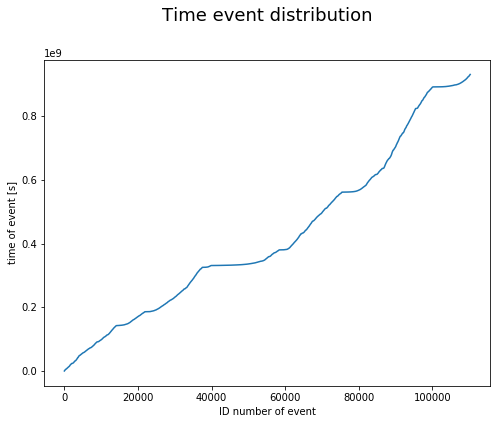

In [18]:
E.TimeEventPlot(df)

## 1.2 - Magnitude distribution

here we can see how the magnitude is distributed as $e^{-m}$



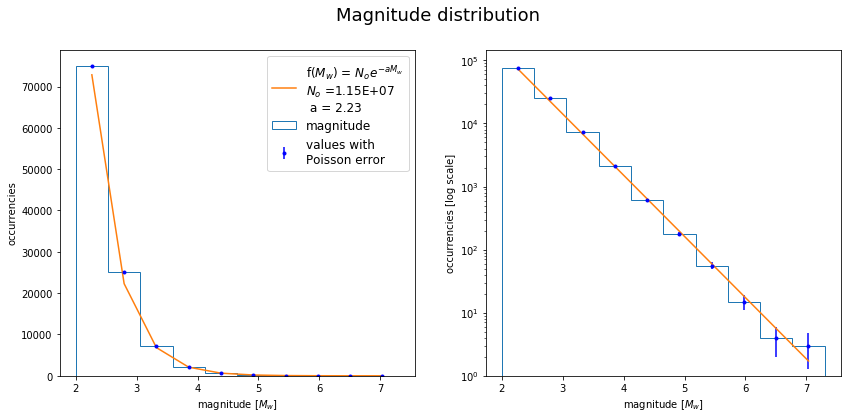

In [19]:
E.MagnitudeDistribution(df)

## 1.3 - Spatial distribution 

In [20]:
import plotly as py # main class
import plotly.graph_objs as go # graphical objects
py = py.offline
py.init_notebook_mode(connected=True)

m_bar = 3.5
dfm = df[df['magnitude'] > m_bar]
x_coord = dfm['x']
y_coord = dfm['y']
z_coord = dfm['z']
magnitude = dfm['magnitude']

# Greys,YlGnBu,Greens,YlOrRd,Bluered,
# RdBu,Reds,Blues,Picnic,Rainbow,
# Portland,Jet,Hot,Blackbody,Earth,
# Electric,Viridis,Cividis. 

trace1 = go.Scatter3d(x=x_coord, y=y_coord, z=z_coord, mode='markers', opacity = 0.7,
                     marker=dict(size=np.exp(magnitude)/np.exp(3.5), colorscale='Electric', 
                     color=np.exp(magnitude)/np.exp(magnitude).max(), line=dict(width=0)))

data = [trace1]
layout = go.Layout()
fig = go.Figure(data=data)
py.iplot(fig)

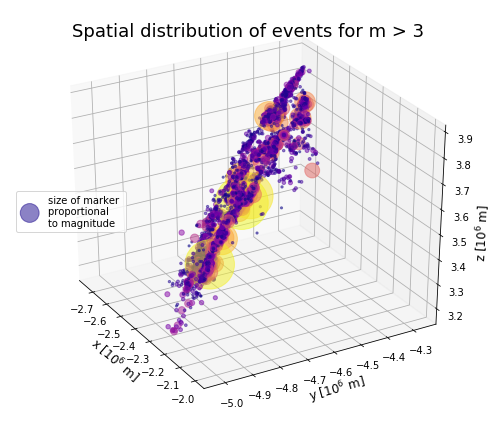

In [21]:
E.SpatialDistribution(df)

### 1.3.1 PCA for spatial distribution

In [22]:
X = df[['x','y','z']].values.T
X = X.astype("float64")

# centering and rescaling the coordinates
for i in range(3):
    X[i] = (X[i] - X[i].mean())/X[i].std()

In [49]:
# PCA 
C = np.cov(X)
U, spectrum, Vt = la.svd(C)
print ('Spectrum: ', spectrum,'\n')
perc_expl2 = (spectrum[0] + spectrum[1]) / spectrum.sum()
print('Percent of the total variability explained considering the two main features: ', perc_expl2, '\n')
print(spectrum[0]/spectrum.sum())

Spectrum:  [2.40189791e+00 5.96194962e-01 1.93433620e-03] 

Percent of the total variability explained considering the two main features:  0.9993552271146224 

0.8006253753552359


As we can see above, the two largest eigenvalues can account for 99.9% of the total variability of the spatial coordinates; thus we can effectively conclude that the events are located on a plane.

Another interesting thing to notice is that the ratio between the largest eigenvalue and the second one is 0.8, meaning that the events on the plane are not uniformly distributed, but follow a more stretched shape (as we could already see in the 3D plot above).

In the following panels we represent the two-dimensional projections of the spatial coordinates of the dataset both for the x,y,z frame and the $v_0, v_1, v_2$ frame (e.g. the one in the PCA coordinates); in the latter one we can see how the $v_2$ component is almost constant and all the relevant information is contained in the scatterplot $v_0$ vs $v_1$, that represents the projection of the original data along the eigenvectors associated to the two largest eigenvalues found in the PCA procedure. 

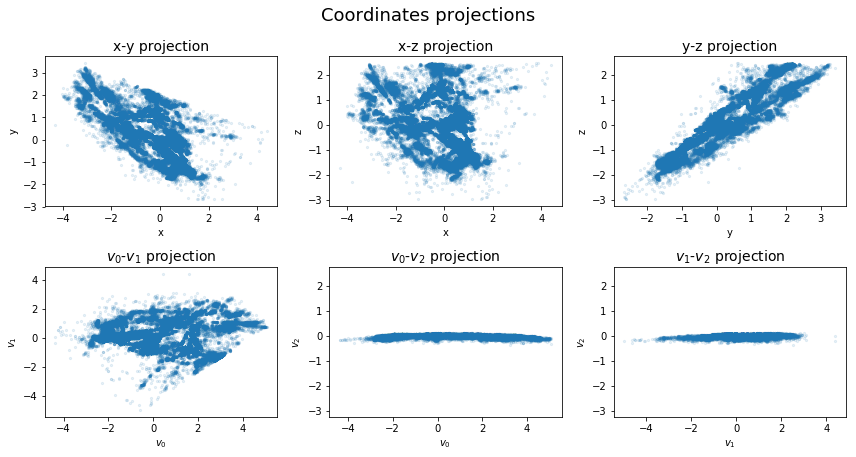

In [24]:
Xp = np.dot(Vt,X)
E.PCA_plot(X, Xp)

Going back to the x,y,z frame, we can see in a trasversal view how the plane that corresponds to the eigenspace of the two largest eigenvectors fits the data. This is further evidence of the PCA efficacy.

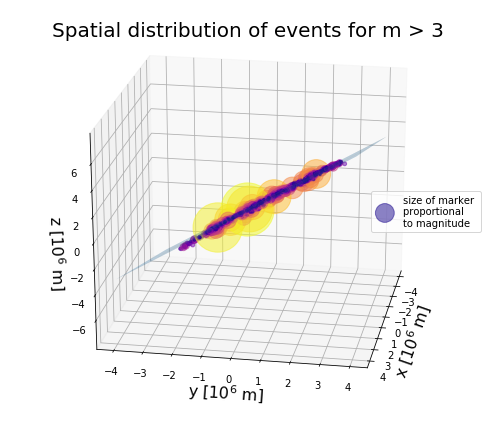

In [26]:
[v1, v2, v3] = Vt
normal = v3  
E.TrasversePlanePlot(df, normal)

Finally we plotted a heatmap of the events using as coordinates the first and the second principal components, to visualize the density of events in those coordinates. The color is brighter where the density is higher, with a scale of colors that is logaritmic in the occurrencies of each cell. 

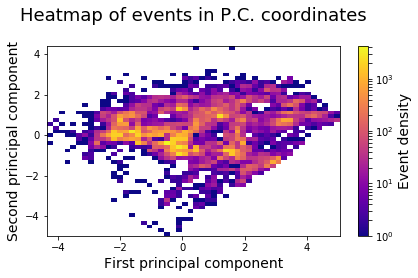

In [27]:
E.HeatmapCoordinatePlot(Xp)

## 1.4 - Tree architecture

Here we want to exploit the information contained in the 'prev_event' column in order to be able to compute quantities such as distance and waiting time between an event and his ancestor.

First of all we iteratively created a nested dictionary, containing as keys the IDs of the primes events (i.e. the ones labelled with 'prev_event' = 1) and as values a dictionary with:
* the "depth" of the event in the cause-effect chain (i.e. 0 for the prime events, 1 for the ones caused by them, 2 for the ones caused by events of depth 1 and so on so forth);
* the "children" of that event, i.e. the events that have as prev_event the id of the event considered; "children" value contains itself a dictionary like the one just described for the prime events, hence the nested structure.

In [28]:
def evees_light(df, index=-1, depth=0):
    dataset = {}
    df_filtered = df[df["prev_event"]==index]
    lenght =  df_filtered.shape[0]
    for i in range(lenght):
        event = df_filtered.iloc[i]
        dataset[str(int(event["event"]))] = {"depth" : depth}
        dataset[str(int(event["event"]))]["children"] = evees_light(df, index=int(event["event"]), depth = depth + 1)
    return dataset

Then we mapped the dictionary so obtained in a list of dictionaries, whose indexes are the depth of the events (ranging from 0 to max_depth, that is unknown a priori); the entry of the list of index i is a dictionary that has as keys the IDs of the events of depth = i and as values the IDs of its children.

In [29]:
def write_dict_array(dataset, dict_array):
    for k in dataset.keys():
        depth = dataset[k]['depth']
        # k is the keyword, children_ids are the values
        if len(dict_array) < depth + 1 :
            while len(dict_array) < depth + 1:
                dict_array.append({})
        else:
            dict_array[depth][k] = list(dataset[k]['children'].keys())
        if len(list(dataset[k]['children'].keys())) != 0:
            write_dict_array(dataset[k]['children'], dict_array)

In [30]:
tree_dataset = evees_light(df)
v_dict = [{}]
write_dict_array(tree_dataset, v_dict)

Now we use the list of dictionaries to add the depth and the number of children (or number of edges if we think of the dataset as an oriented graph) of each event by adding two columns to the original dataset.

In [31]:
N = df.shape[0]
edges = np.zeros(N)
depths = np.zeros(N)

for d in range(len(v_dict)):
    for k in v_dict[d].keys():
        edges[int(k)] = len(v_dict[d][k])
        depths[int(k)] = d
        
        

df['edges'] = edges
df['depth'] = depths

From the new features we can see an interesting thing: the event with the highest magnitude $(7.3)$ is not prime 
(because it hasn't prev_event = $-1$), but it happend after a concatenation of $11$ earthquakes and subsequently 
caused other $4209$ events!

In [32]:
df[df['magnitude'] == 7.3]

,event,prev_event,time,magnitude,x,y,z,edges,depth
39805,39805,39804,3.309144e+08,7.3,-2341818,-4710335,3575181,4209.0,11.0


Furthermore we can see that depth isn't a good indicator of magnitude and that in fact one can't find any relation
between the two

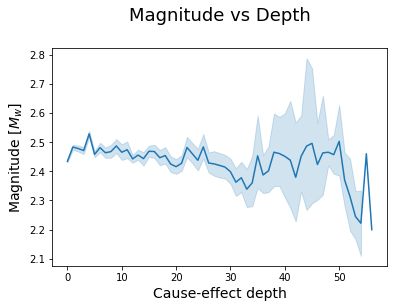

In [33]:
E.MagnitudeDepthPlot(df)

As we could expect the events with higher magnitudes have much more edges than the ones with lower magnitudes. 
In fact the dependence is exponential with $m$


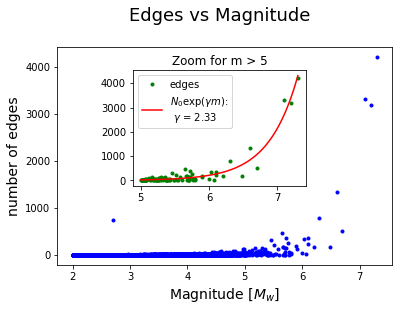

In [34]:
E.EdgesMagnitudePlot(df)

Again depth isn't a good indicator of edges (as it wasn't for magnitude)

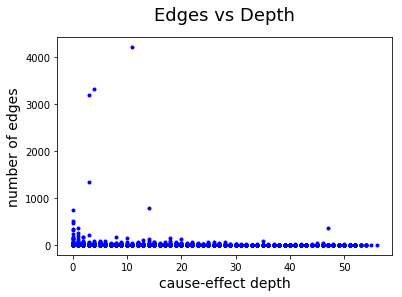

In [35]:
E.EdgesDepthPlot(df)

# 2 - Distribution of waiting time 
Compute the distribution $P_m(t)$ of waiting times for events of magnitude m or above (i.e. do not consider events below $m$). In shaping the bin sizes, take into account that this distribution is expected to have a power-law decay with time (e.g $\sim 1/t$), and that a power-law is well visualized in log-log scale. Do this analysis for many values of $m$, say $m=2,3,4,5$.

we choose to study the data for $m$ between $2$ and $4.5$, because above $5$ we get just $104$ samples 
and there isn't enough information to fit anything but the initial peak of the distribution.


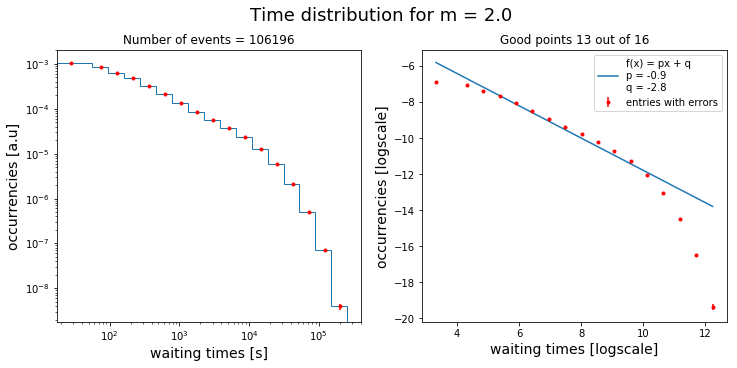

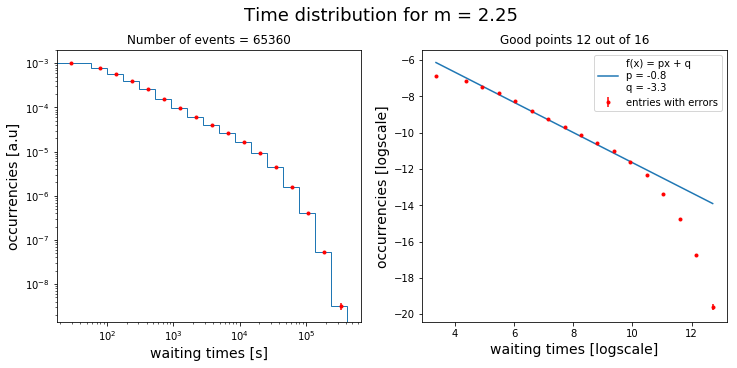

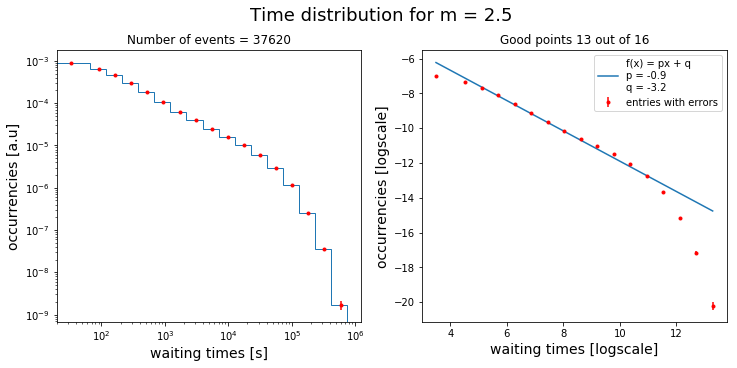

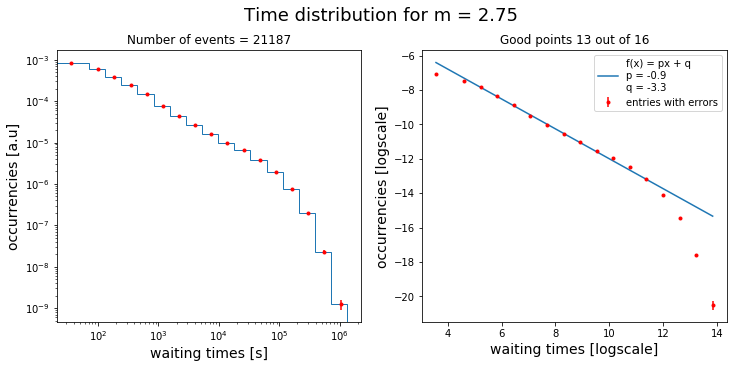

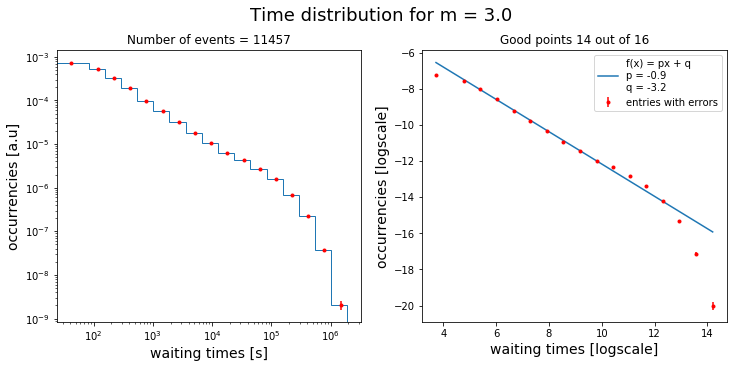

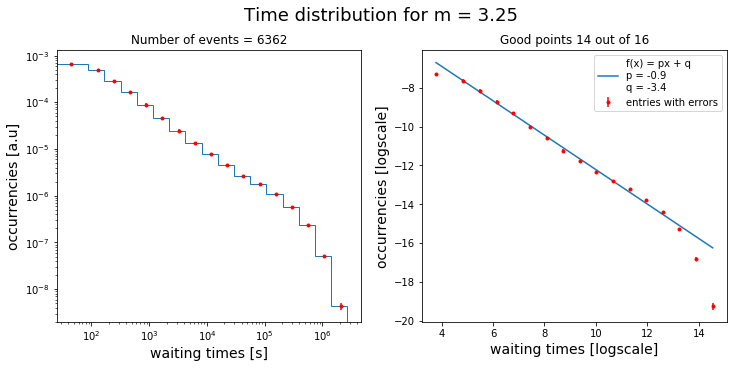

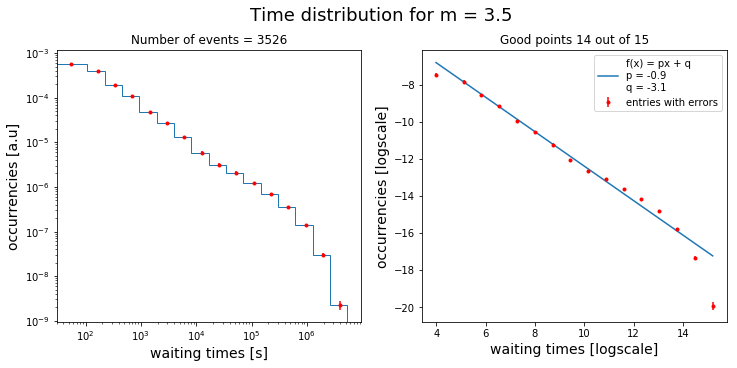

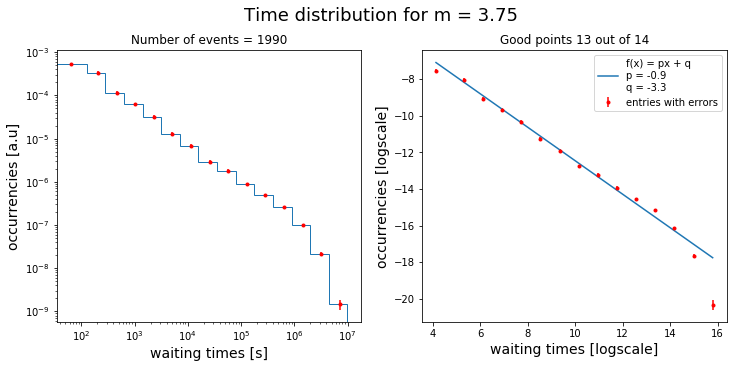

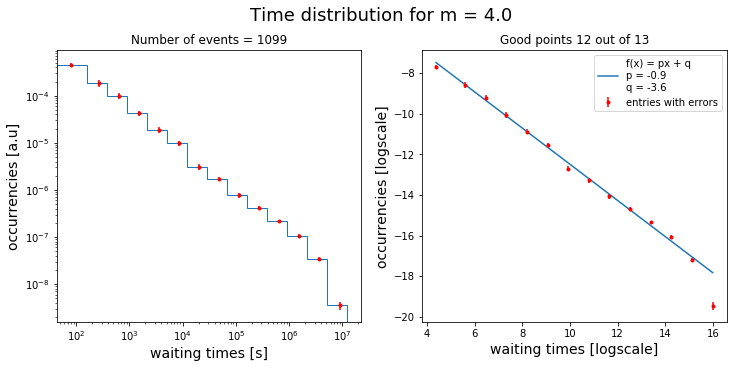

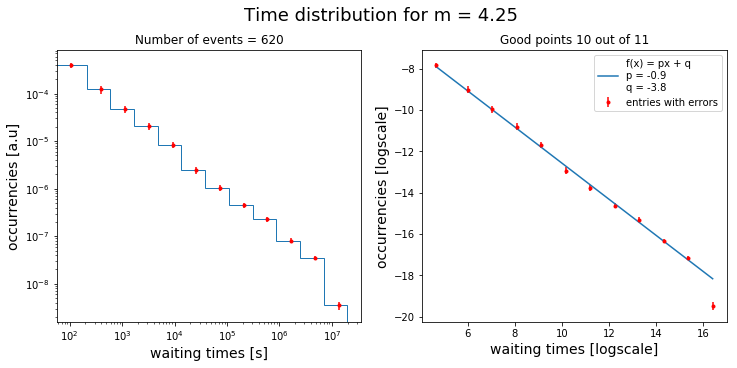

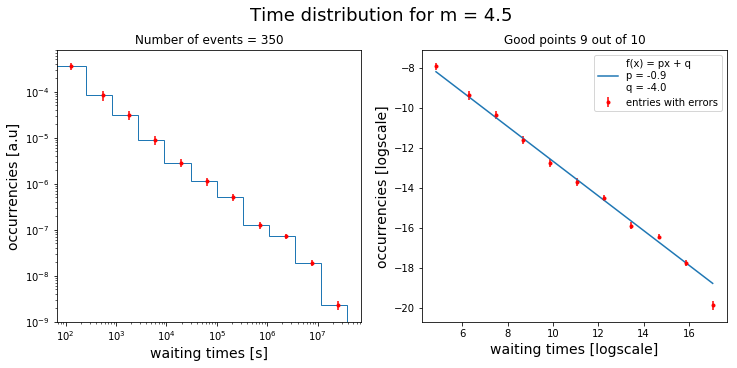

In [36]:
ms1 = np.linspace(2,4.5,11)
p_time = np.zeros(len(ms1))
q_time = np.zeros(len(ms1))
p_t_errors = np.zeros(len(ms1))
cut_times = np.zeros(len(ms1))

for i in range(len(ms1)):
    m = ms1[i]
    # waiting time for events of magnitude > m
    dfm = df[df['magnitude'] > m]
    timem = np.array(dfm['time'])
    timem.sort()
    time_d = timem[1:] - timem[:-1]
    # eliminating a couple of anomalous events
    temp = time_d[time_d != time_d.max()]
    maximum = temp.max()
    if time_d.max()*3/4 > maximum:
        time_d = temp
    title = 'Time distribution for m = ' + str(m)
    p_time[i], q_time[i], p_t_errors[i], cut_times[i] = E.plot_powerlaw_hist(time_d, rescaling = False, 
                                                                   density = True, cut_off = True, P0 = 5, suptitle = title)

From the analysis of the p exponent of $P(t) \propto t^p$ we can't find any significant pattern in the dipendence from the magnitude.

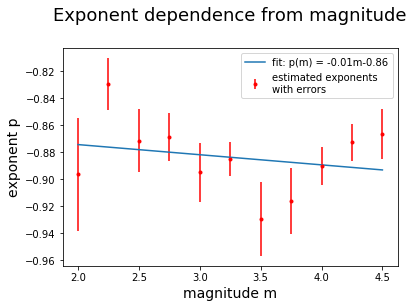

In [37]:
E.EsponentMagnitudePlot(ms1, p_time, p_t_errors)

Instead the cut-off time has an exponential dependence from the magnitude. We will see in the last section how this relation can be used for a rescaling procedure that collapses the distributions of the waiting times for each magnitude to a single, magnitude-independent, distribution.

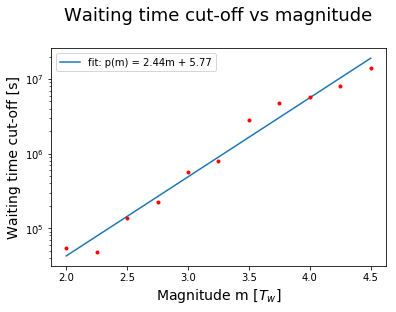

In [38]:
cut_times = E.WaitingMagnitudePlot(ms1, cut_times)

### 2.2 - Waiting time distribution between concatenated events 

We now analyze the distribution of waiting times but considering only the waiting times between an event and the ancestor.

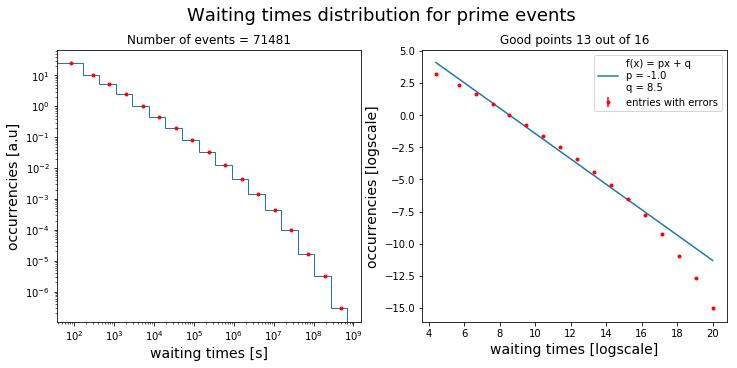

In [53]:
E.WaitingTimePriveEvents(df, v_dict)

We can see that the waiting time distribution of consequent events displaces a behaviour similar to the more general case seen above, i.e. a power law with a cut-off. 

# 3 - Distance distribution between events

Compute the distribution $P_m(r)$ of the distance between an event and the next one, considering earthquakes of magnitude m or above. Also here make a clever choice for the bin sizes and try several values of $m$.

Unlike the previous case, with this kind of distribution we found that drawing the bin's widths from a evenly spaced sequence in the logaritmic space was highly unstable. This is beacuse this distribution isn't monotonically decreasing, but there is a peak "inside" the first bin.

Thus we started by visualizing the distribution with a histogram with bins of constant width and then we tackled the problem with a different approach, by decomposing the distance distribution in two sub-distributions that could explain it.

For m = 2.0 and N = 106197 the minimum number of events in the tail required is : 106
Minimum accuracy expected : 0.9


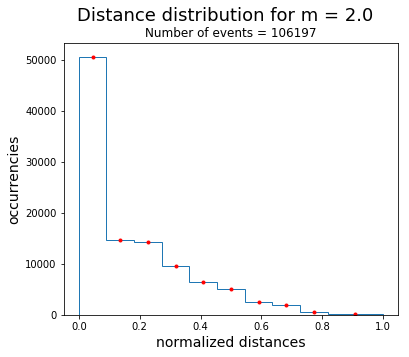

For m = 2.5 and N = 37621 the minimum number of events in the tail required is : 62
Minimum accuracy expected : 0.87


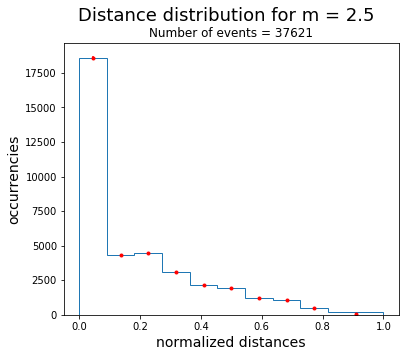

For m = 3.0 and N = 11457 the minimum number of events in the tail required is : 31
Minimum accuracy expected : 0.82


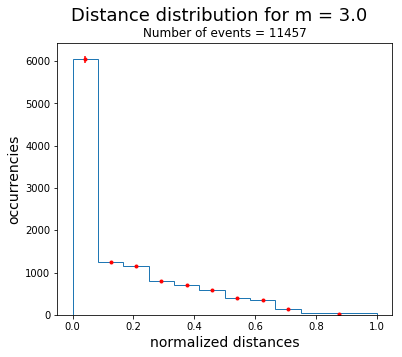

For m = 3.5 and N = 3526 the minimum number of events in the tail required is : 15
Minimum accuracy expected : 0.74


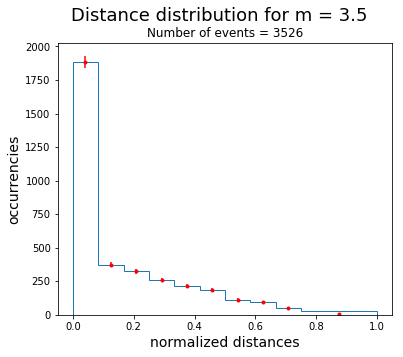

For m = 4.0 and N = 1099 the minimum number of events in the tail required is : 10
Minimum accuracy expected : 0.68


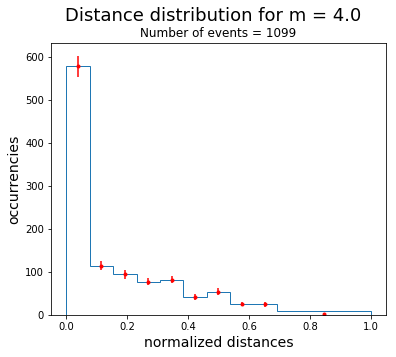

For m = 4.5 and N = 350 the minimum number of events in the tail required is : 10
Minimum accuracy expected : 0.68
-> reducing the final number of bins to 9: 

For m = 4.5 and N = 350 the minimum number of events in the tail required is : 10
Minimum accuracy expected : 0.68
-> reducing the final number of bins to 8: 

For m = 4.5 and N = 350 the minimum number of events in the tail required is : 10
Minimum accuracy expected : 0.68
-> reducing the final number of bins to 7: 

For m = 4.5 and N = 350 the minimum number of events in the tail required is : 10
Minimum accuracy expected : 0.68
-> reducing the final number of bins to 6: 

For m = 4.5 and N = 350 the minimum number of events in the tail required is : 10
Minimum accuracy expected : 0.68
-> reducing the final number of bins to 5: 

For m = 4.5 and N = 350 the minimum number of events in the tail required is : 10
Minimum accuracy expected : 0.68


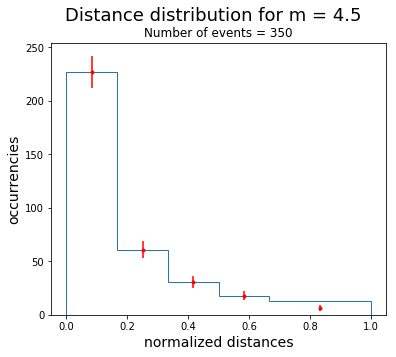

In [40]:
ms = np.linspace(2,4.5,6)
E.DistanceDistributionPlot(df, ms) 

## Distance distribution decomposition

The distributions that can be seen above can't be easily identified with a known distribution, thus we decomposed it in two different contributions using our knowledge about how the earthquakes relate one to each other. In fact they can be studied as a sequence of independent events (the ones with prev_event = -1), each one of them causing a cluster of related events, as we have already seen in the study of the tree architecture of the dataset.

Thus we expect that the overall distance distribution is the result of the following process:
* each earthquake has a magnitude distributed as $P(m) \propto e^{-am}$, $a > 0$;
* each earthquake causes N events depending on his magnitude with distibution $N(m) = N_0e^{\gamma m}$, $\gamma > 0$;
* prime events are independent one from another and are distributed with a certain distance distribution $P'_m(r)$;
* consequent events (i.e. all the events that are not prime) have a distance r from the event that caused them, that is distributed with another distribution $P^{cons}(r)$ (here we drop the m-dependence, because a threshold on m is going to breake the chain of cause-effect, that is univoque);

This four distributions, if known, could reproduce the probability distribution of the distance between two "following" events; thus in this section we are going to study $P'_m(r)$ and $P^{cons}(r).$

## 3.1 - Distance distribution between prime events

We plotted for each magnitude the normalized distances between two events and fitted them with a continuous Poisson distribution, that is usually used for independent event with a well-defined expected value.

For m = 2.0 and N = 37157 the minimum number of events in the tail required is : 37
Minimum accuracy expected : 0.84
Number of bins merged into the tail: 1 



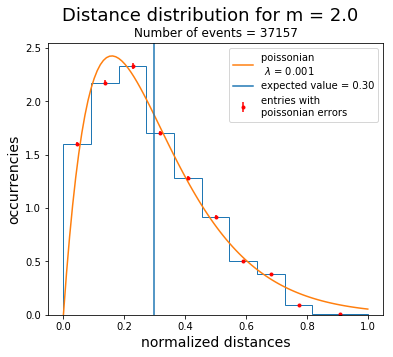

For m = 2.25 and N = 22268 the minimum number of events in the tail required is : 28
Minimum accuracy expected : 0.81
Number of bins merged into the tail: 1 



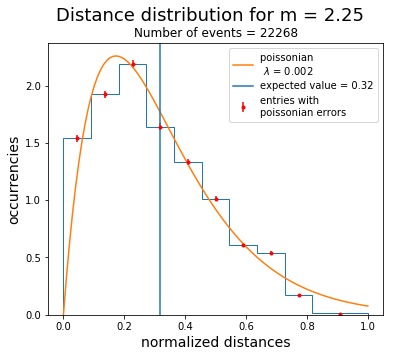

For m = 2.5 and N = 12482 the minimum number of events in the tail required is : 20
Minimum accuracy expected : 0.78
Number of bins merged into the tail: 1 



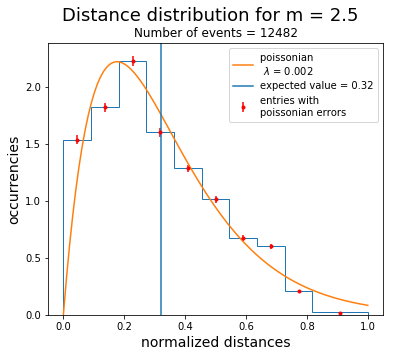

For m = 2.75 and N = 6848 the minimum number of events in the tail required is : 14
Minimum accuracy expected : 0.73
Number of bins merged into the tail: 1 



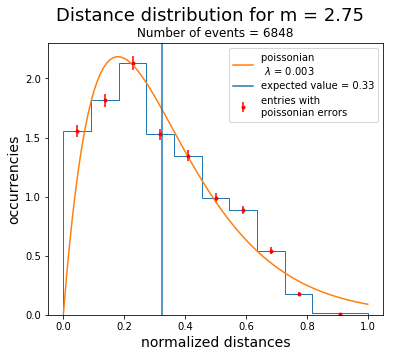

For m = 3.0 and N = 3567 the minimum number of events in the tail required is : 10
Minimum accuracy expected : 0.68
Number of bins merged into the tail: 1 



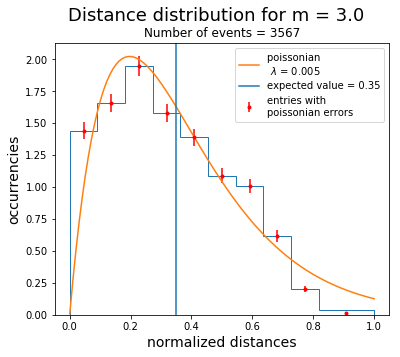

For m = 3.25 and N = 1866 the minimum number of events in the tail required is : 10
Minimum accuracy expected : 0.68
Number of bins merged into the tail: 1 



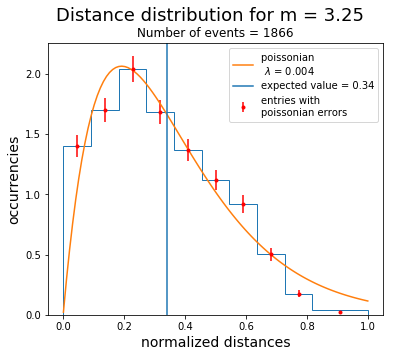

For m = 3.5 and N = 993 the minimum number of events in the tail required is : 10
Minimum accuracy expected : 0.68
Number of bins merged into the tail: 1 



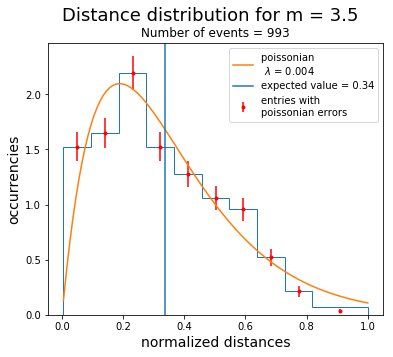

For m = 3.75 and N = 555 the minimum number of events in the tail required is : 10
Minimum accuracy expected : 0.68
Number of bins merged into the tail: 2 



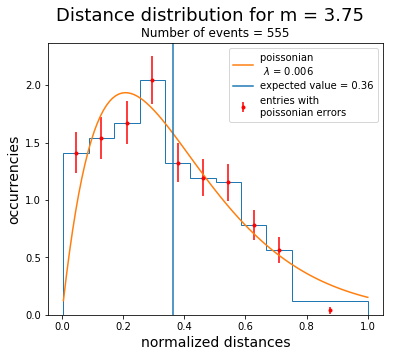

For m = 4.0 and N = 300 the minimum number of events in the tail required is : 10
Minimum accuracy expected : 0.68
Number of bins merged into the tail: 3 



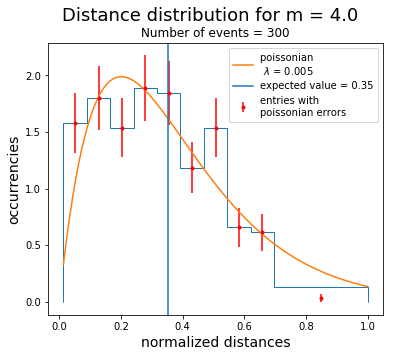

In [41]:
pr_r_expected, pr_r_exp_err, pr_r_max, pr_ms = E.PrimeEventsDistanceDistributionPlot(df)

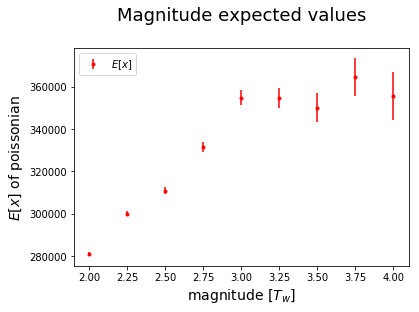

In [42]:
E.ExpectedMagnitudePlot(pr_r_expected, pr_r_exp_err, pr_r_max, pr_ms)

In the graph we can see that the expected value of the distance between two events grows linearly as a function of the magnitude until $m = 3.0$, where there is a plateau, indicating some kind of saturation effect. 

## 3.2 - Distance distribution between consequent events

In [43]:
distance_tree = np.zeros(N)

for d in range(len(v_dict)):
    for k in v_dict[d].keys():
        # previous vertex has id = k, children vertexes have ids [ v_dict[d][k] ]
        for j in v_dict[d][k]:
            distance_tree[int(j)] = np.linalg.norm(df[['x','y','z']].iloc[int(j)] - df[['x','y','z']].iloc[int(k)])

distance_tree = distance_tree[distance_tree > 0]

In the panels below we can see that for consequent events we find once again a powerlaw with a cut-off, just like in the waiting times distribution, even though in this case our analysis can't be performed for all the magnitudes, because this would break the chain of cause-effect that is necessary to the algorithm itself to compute the waiting times.

Merging first and second bins.


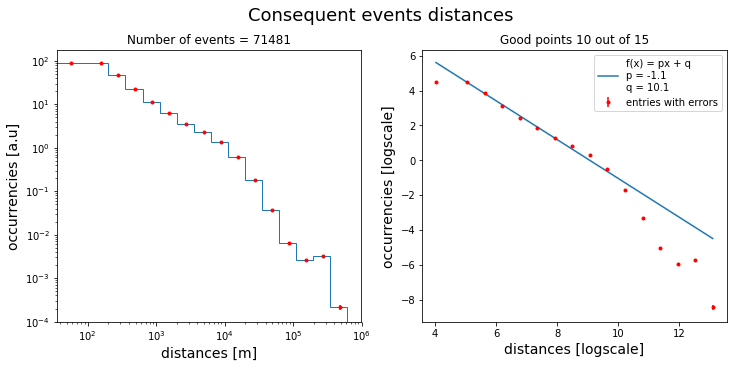

In [55]:
out = E.plot_powerlaw_hist_dist(distance_tree, suptitle = "Consequent events distances", rescaling = False, density = False, cut_off = True)

## 4 - Range-conditioned waiting time distribution

Compute the distribution $P_{m,R}(t)$ of waiting times for events of magnitude $m$ or above, which are separated by at most a distance $r<R$, for different values of m and $R$. (In this statistics, if the following event is farther than $R$, skip the $t$ and go to the next pair)

In our analysis we choose to analyze the waiting times distribution for different areas around n fixed centers (uniformly distributed in the plane identified with the PCA procedure).
We proceed as follows: 
* we filter the dataset with the threshold magnitude > m;
* for each center $C_i$ and each radius $r_j$ (expressed in fractions of the maximum distance between two events in the dataset) we select only the events whose normalized distance (w.r.t the max distance) from $C_i$ is less than $r_j$; 
* we compute the waiting times from each event to the one among the remaining that comes right after it (again this is done for n centers and for each radius)
* we make a histogram using all the waiting times for a given radius and ALL centers (in this way the resulting distribution is a kind of mean among all centers) and study it as a powerlaw with cutoff (after all is derived from the waiting time distribution seen above, that is a powerlaw with cutoff too)

In [54]:
from tqdm import tqdm_notebook, tnrange

R_fractions = 20
ms = np.arange(2,4.6,0.1)
Rs = np.power(np.linspace(np.sqrt(0.1),1,R_fractions),2)
Ps = np.zeros((len(ms),R_fractions))
Qs = np.zeros((len(ms),R_fractions))
P_errors = np.zeros((len(ms),R_fractions))
t_cutoff = np.zeros((len(ms),R_fractions))

for i in tnrange(len(ms)):
    Ps[i], Qs[i], P_errors[i], t_cutoff[i] = E.plot_PmR_t(df, ms[i], U, Rs, cut_off = True, P0 = 5, show = False )


Time distribution for m =  2.0 

Max distance :  1.0
Entered in the while loop.
Original frequencies:  [ 620263.  438749.  588542.  719766.  804100.  872804.  981493. 1123166.
 1230793. 1242505. 1031916.  618448.  231010.   41195.    1813.       0.
       0.]
Merging bin 15 (empty) with bin 14.
Entered in the while loop.
Original frequencies:  [ 620263.  438749.  588542.  719766.  804100.  872804.  981493. 1123166.
 1230793. 1242505. 1031916.  618448.  231010.   41195.    1813.       0.]
Merging bin 15 (empty) with bin 14.
Entered in the while loop.
Original frequencies:  [ 620678.  439179.  588675.  720145.  804517.  873762.  981595. 1124146.
 1232582. 1243078. 1032872.  618218.  230657.   41037.    1801.       0.
       0.]
Merging bin 15 (empty) with bin 14.
Entered in the while loop.
Original frequencies:  [ 620678.  439179.  588675.  720145.  804517.  873762.  981595. 1124146.
 1232582. 1243078. 1032872.  618218.  230657.   41037.    1801.       0.]
Merging bin 15 (empty) with bi

From our analysis of the cutoff times at different radii and magnitudes we can see that there are two different trends: 
* the cutoff waiting time increases as the magnitude increases (as we saw before with the exponential dependence from m)
* the cutoff waiting time increases as the radius decreases

The second trend can be interpreted as the fact that background (uncorrelated) events are more rare if we reduce the area of study and this implies a longer correlation between earthquakes in a smaller area (if the magnitude is fixed).

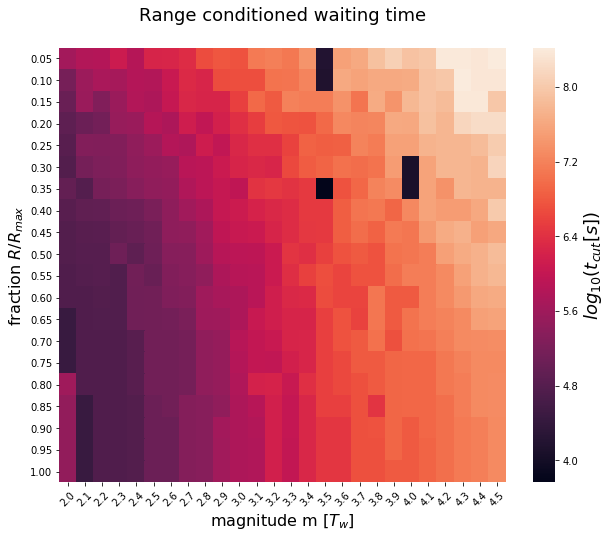

In [46]:
E.RangeMagnitudePlot(ms, Rs, t_cutoff)

# 5 - Scaling properties
Eventually note if, from the analysis of the previous points, there emerges a scaling picture. Is there a suitable rescaling that collapses distributions for various $m$ (and eventually $R$ if point 4 is considered) on a single curve?

## 5.1 - Time scaling with magnitude

As we anticipated before, if for each magnitude we divide all the time intervals for the correspondent cutoff time (and we rescale the weights multiplying by the cutoff, in order to preserve the normalization of each histogram) we obtain a unique powerlaw with cutoff independent from the magnitude. 

This means that the system has a scaling property that binds waiting times and magnitudes in a unique way.

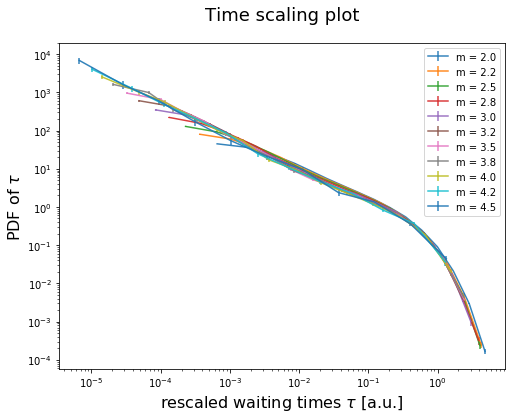

In [47]:
E.ScalingPlot(df, ms1, cut_times)